Information about your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">ISSA</p>| <p style="text-align: left">Sayegh</p> | k11904028 |
| <p style="text-align: left">PEER</p>| <p style="text-align: left">HANNA</p> | k12220447 |


<h2 style="text-align: center">344.105/6/7/12/13 UE: Natural Language Processing (WS2024/25)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.


    
</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

### Assignment objective

The aim of the assignment is to implement a document (sentence) classification model with (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment including the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum available in MOODLE. It is also recommended to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.



### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.



### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

   
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from collections import Counter
import numpy as np

In [ ]:
data_path = "nlp2023_24_data/"

# Load the datasets
train_data = pd.read_csv(f"{data_path}thedeep.subset.train.txt", sep=",", names=["sentence_id", "text", "label"])
validation_data = pd.read_csv(f"{data_path}thedeep.subset.validation.txt", sep=",", names=["sentence_id", "text", "label"])
test_data = pd.read_csv(f"{data_path}thedeep.subset.test.txt", sep=",", names=["sentence_id", "text", "label"])

print("Train Data Sample:")
print(train_data.head())

print("\nValidation Data Sample:")
print(validation_data.head())

print("\nTest Data Sample:")
print(test_data.head())

Train Data Sample:
   sentence_id                                               text  label
0         5446  In addition to the immediate life-saving inter...      9
1         8812  There are approximately 2.6 million people cla...      3
2        16709  While aid imports have held up recently, comme...      5
3         3526  Heavy rainfalls as well as onrush of water fro...      0
4         4928  Based on field reports 9 , the main production...      3

Validation Data Sample:
   sentence_id                                               text  label
0          633  The veterans threw up roadblocks on the main n...      9
1         6001  Water department complains about lack of skill...     11
2        14014  On 13 February 2018, the Ministry of Health of...      4
3        12225  In Kakuma and Kalobeyei, both host and refugee...      7
4        10181  'Raqqa is now empty of civilians who had been ...      9

Test Data Sample:
   sentence_id                                               

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to C:\Users\Bashar
[nltk_data]     Hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_and_normalize_text(text, use_stemming=False, remove_stopwords=True):
    # lowercase
    text = text.lower()
    
    # Removes punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)
    
    # Replaces numbers with NUMTOKEN token
    text = re.sub(r"\d+", "NUMTOKEN", text)
    
    # Replace months with DATETOKEN token
    text = re.sub(r"\b(january|february|march|april|may|june|july|august|september|october|november|december)\b", "DATETOKEN", text, flags=re.IGNORECASE)
    
    # Tokenize
    tokens = text.split()
    
    # Removes stopwords if True
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    else:
        # Processes tokens individually, preserving NUMTOKEN and DATETOKEN
        tokens = [token.lemma_ if token.text not in ["NUMTOKEN", "DATETOKEN"] else token.text for token in nlp(" ".join(tokens))]
    
    # Replaces tokens back with <num> and <date> and clean up spaces
    cleaned_text = " ".join(tokens).replace("NUMTOKEN", "<num>").replace("DATETOKEN", "<date>")
    
    return cleaned_text


train_data['cleaned_text'] = train_data['text'].apply(clean_and_normalize_text)
validation_data['cleaned_text'] = validation_data['text'].apply(clean_and_normalize_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_and_normalize_text)

print("Original vs Cleaned Text (Train Data):")
print(train_data[['text', 'cleaned_text']].head())


Original vs Cleaned Text (Train Data):
                                                text  \
0  In addition to the immediate life-saving inter...   
1  There are approximately 2.6 million people cla...   
2  While aid imports have held up recently, comme...   
3  Heavy rainfalls as well as onrush of water fro...   
4  Based on field reports 9 , the main production...   

                                        cleaned_text  
0  addition immediate lifesave intervention unice...  
1  approximately <num> million people classify ph...  
2  aid import hold recently commercial food fuel ...  
3  heavy rainfall well onrush water upstream megh...  
4  base field report <num> main production challe...  


In [ ]:
def build_vocabulary(data, min_frequency=2):
    # Tokenize all the cleaned text and count the frequencies
    all_tokens = " ".join(data['cleaned_text']).split()
    # print("tokens", all_tokens[:100])
    token_counts = Counter(all_tokens)
    
    # Apply frequency threshold
    vocabulary = {token for token, count in token_counts.items() if count >= min_frequency}
    # print("vocab: 123", vocabulary)
    # Add a special token for OOV words
    vocabulary.add("<OOV>")
    
    return vocabulary, token_counts

vocabulary, token_counts = build_vocabulary(train_data, min_frequency=2)

print(f"Total unique tokens: {len(token_counts)}")
print(f"Vocabulary size after applying frequency threshold: {len(vocabulary)}")
print("Sample of vocabulary:", list(vocabulary)[:10])

Total unique tokens: 27150
Vocabulary size after applying frequency threshold: 12981
Sample of vocabulary: ['nambong', 'member', 'metre', 'xinjiang', 'theme', 'ear', 'gcff', '<num>he', 'phu', 'slip']


In [ ]:
def replace_oov_tokens(text, vocabulary):
    # Replaces words that are not in the vocab with <OOV>
    tokens = text.split()
    tokens = [token if token in vocabulary else "<OOV>" for token in tokens]
    return " ".join(tokens)

train_data['processed_text'] = train_data['cleaned_text']
validation_data['processed_text'] = validation_data['cleaned_text'].apply(lambda x: replace_oov_tokens(x, vocabulary))
test_data['processed_text'] = test_data['cleaned_text'].apply(lambda x: replace_oov_tokens(x, vocabulary))

print("Processed Validation Data Example:")
print(validation_data[['cleaned_text', 'processed_text']].head(10))

Processed Validation Data Example:
                                        cleaned_text  \
0  veteran throw roadblock main northbound highwa...   
1  water department complain lack skilled worker ...   
2  <num> <date> <num> ministry health democratic ...   
3  kakuma kalobeyei host refugee community depend...   
4  raqqa empty civilian take human shield say <nu...   
5  <num> case malnutrition first <num> week <num>...   
6  locust kill <num> agricultural crops idlib pro...   
7  ground justify adoption principle statement me...   
8  people force fetch foul water area darsasiya o...   
9  iranian official say <num> people need emergen...   

                                      processed_text  
0  veteran throw roadblock main <OOV> highway mor...  
1  water department complain lack skilled worker ...  
2  <num> <date> <num> ministry health democratic ...  
3  kakuma kalobeyei host refugee community depend...  
4  raqqa empty civilian take human shield say <nu...  
5  <num> case maln

In [ ]:
def calculate_term_frequency(data, vocabulary):
    term_freq_matrix = np.zeros((len(data), len(vocabulary)))  # Initialize empty matrix
    vocab_list = list(vocabulary)
    
    for i, doc in enumerate(data):
        tokens = doc.split()
        token_counts = Counter(tokens)
        
        for token, count in token_counts.items():
            if token in vocabulary:
                term_freq_matrix[i, vocab_list.index(token)] = count  # Fill in term frequency
    
    return term_freq_matrix

In [ ]:

def calculate_idf(data, vocabulary):
    N = len(data)  # Number of documents
    vocab_list = list(vocabulary)
    df = np.zeros(len(vocabulary))  # Document frequency for each term

    for doc in data:
        tokens = set(doc.split())  # Unique tokens in the document
        for token in tokens:
            if token in vocabulary:
                df[vocab_list.index(token)] += 1

    # Compute IDF for each term
    idf = np.log((N + 1) / (df + 1))  # to avoid division by zero
    return idf

def calculate_tfidf(tf_matrix, idf):
    return tf_matrix * idf

def create_tfidf_vectors(train_data, validation_data, test_data, vocabulary):
    # Term Frequency (TF)
    tf_train = calculate_term_frequency(train_data, vocabulary)
    tf_validation = calculate_term_frequency(validation_data, vocabulary)
    tf_test = calculate_term_frequency(test_data, vocabulary)
    
    # Inverse Document Frequency (IDF)
    idf = calculate_idf(train_data, vocabulary)
    
    # TF-IDF
    tfidf_train = calculate_tfidf(tf_train, idf)
    tfidf_validation = calculate_tfidf(tf_validation, idf)
    tfidf_test = calculate_tfidf(tf_test, idf)
    
    return tfidf_train, tfidf_validation, tfidf_test

tfidf_train, tfidf_validation, tfidf_test = create_tfidf_vectors(
    train_data['processed_text'], validation_data['processed_text'], test_data['processed_text'], vocabulary
)

print(f"TF-IDF Train Shape: {tfidf_train.shape}")
print(f"TF-IDF Validation Shape: {tfidf_validation.shape}")
print(f"TF-IDF Test Shape: {tfidf_test.shape}")


TF-IDF Train Shape: (12110, 12981)
TF-IDF Validation Shape: (2596, 12981)
TF-IDF Test Shape: (2595, 12981)


In [ ]:
# Function to calculate raw term frequency vectors (already implemented above)
def create_tf_vectors(train_data, validation_data, test_data, vocabulary):
    tf_train = calculate_term_frequency(train_data, vocabulary)
    tf_validation = calculate_term_frequency(validation_data, vocabulary)
    tf_test = calculate_term_frequency(test_data, vocabulary)
    return tf_train, tf_validation, tf_test

# Generate TF Vectors
tf_train, tf_validation, tf_test = create_tf_vectors(
    train_data['processed_text'], validation_data['processed_text'], test_data['processed_text'], vocabulary
)

print(f"TF Train Shape: {tf_train.shape}")
print(f"TF Validation Shape: {tf_validation.shape}")
print(f"TF Test Shape: {tf_test.shape}")

TF Train Shape: (12110, 12981)
TF Validation Shape: (2596, 12981)
TF Test Shape: (2595, 12981)


In [10]:
def calculate_sparsity(matrix):
    total_elements = matrix.size
    zero_elements = np.sum(matrix == 0)
    sparsity_rate = (zero_elements / total_elements) * 100
    return sparsity_rate

In [ ]:
train_sparsity_tfidf = calculate_sparsity(tfidf_train)
validation_sparsity_tfidf = calculate_sparsity(tfidf_validation)
test_sparsity_tfidf = calculate_sparsity(tfidf_test)

print(f"Sparsity Rate (TF-IDF - Train): {train_sparsity_tfidf:.2f}%")
print(f"Sparsity Rate (TF-IDF - Validation): {validation_sparsity_tfidf:.2f}%")
print(f"Sparsity Rate (TF-IDF - Test): {test_sparsity_tfidf:.2f}%")

Sparsity Rate (TF-IDF - Train): 99.75%
Sparsity Rate (TF-IDF - Validation): 99.75%
Sparsity Rate (TF-IDF - Test): 99.75%


In [ ]:
train_sparsity_tf = calculate_sparsity(tf_train)
validation_sparsity_tf = calculate_sparsity(tf_validation)
test_sparsity_tf = calculate_sparsity(tf_test)

print(f"Sparsity Rate (TF - Train): {train_sparsity_tf:.2f}%")
print(f"Sparsity Rate (TF - Validation): {validation_sparsity_tf:.2f}%")
print(f"Sparsity Rate (TF - Test): {test_sparsity_tf:.2f}%")

Sparsity Rate (TF - Train): 99.75%
Sparsity Rate (TF - Validation): 99.75%
Sparsity Rate (TF - Test): 99.75%


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

To evaluate the models, use <ins>accuracy</ins> as the metric. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.



### Dummy baseline

Here I am applying a simple model that predicts the most frequent class

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['processed_text'])
X_validation_counts = vectorizer.transform(validation_data['processed_text'])
X_test_counts = vectorizer.transform(test_data['processed_text'])

most_frequent_dummy = DummyClassifier(strategy='most_frequent', random_state=42)
most_frequent_dummy.fit(X_train_counts, train_data['label'])

y_pred_t = most_frequent_dummy.predict(X_test_counts)
accuracy_t = accuracy_score(test_data['label'], y_pred_t)
y_pred_v = most_frequent_dummy.predict(X_validation_counts)
accuracy_v = accuracy_score(validation_data['label'], y_pred_v)
print(f"Most Frequent Baseline Accuracy of test set: {accuracy_t:.4f}")
print(f"Most Frequet Baseline Accuracy of validation set: {accuracy_v:.4f}")

Most Frequent Baseline Accuracy of test set: 0.2447
Most Frequet Baseline Accuracy of validation set: 0.2562


### Training and tuning classifiers

In this section I implemented 2 models:
- Random Forest with 2 variable hyper-parameters:
    - the number of decision trees, its optimal value was 100 on both TF and TF-IDF dataset
    - the depth of each tree, its optimal value was 20 on both TF and TF-IDF dataset
- Multilayer Perceptron with 1 variable parameter which the number of neurons in the hidden layer

#### Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

class RandomForestTextClassifier:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.model = RandomForestClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth, random_state=4)
        
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        return self.model.predict(X_test)
        
    def evaluate(self, X_test, y_test, is_test=False):
        y_pred = self.predict(X_test)
        if is_test:
            print(f"Random Forest Classifier with {self.n_estimators} Trees and {self.max_depth} depth :")
            print("Accuracy:", accuracy_score(y_test, y_pred))
        return accuracy_score(y_test, y_pred)

class RandomForestTextClassifierWithTFIDF:
    def __init__(self, n_estimators=100, max_depth=None, max_features=5000):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.vectorizer = TfidfVectorizer(max_features=self.max_features) 
        self.model = RandomForestClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth, random_state=4)
        
    def fit(self, X_train, y_train):
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        self.model.fit(X_train_tfidf, y_train)
        
    def predict(self, X_test):
        X_test_tfidf = self.vectorizer.transform(X_test)
        return self.model.predict(X_test_tfidf)
        
    def evaluate(self, X_test, y_test, is_test=False):
        y_pred = self.predict(X_test)
        if is_test:
            print(f"Random Forest Classifier with {self.n_estimators} Trees and {self.max_depth} depth :")
            print("Accuracy:", accuracy_score(y_test, y_pred))
        return accuracy_score(y_test, y_pred)


Initialize and test the random forest classifier on the tfidf dataset

In [15]:
n_estimators = [10, 50, 100, 200]
max_depth = [5, 10, 20]
benchmark_rf_tfidf = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy'])

for n in n_estimators:
    for d in max_depth:
        rf_classifier = RandomForestTextClassifier(n_estimators=n, max_depth=d)
        rf_classifier.fit(tfidf_train, train_data['label'])
        benchmark_rf_tfidf = pd.concat([benchmark_rf_tfidf, 
                            pd.DataFrame({'n_estimators': [n], 
                                        'max_depth': [d], 
                                        'accuracy': [rf_classifier.evaluate(tfidf_validation, validation_data['label'])]})], 
                            ignore_index=True)



best_params = benchmark_rf_tfidf.loc[benchmark_rf_tfidf['accuracy'].idxmax()]

best_n_estimators = int(best_params['n_estimators'])
best_max_depth = int(best_params['max_depth'])

print(f"Best parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}")
print(benchmark_rf_tfidf)

rf_classifier_tfidf = RandomForestTextClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
rf_classifier_tfidf.fit(tfidf_train, train_data['label'])

final_accuracy = rf_classifier_tfidf.evaluate(tfidf_test, test_data['label'], is_test=True)
print(f"Final model accuracy on the test set: {final_accuracy}") 

Best parameters: n_estimators=100, max_depth=20
   n_estimators max_depth  accuracy
0            10         5  0.503467
1            10        10  0.562789
2            10        20  0.647149
3            50         5  0.532357
4            50        10  0.592450
5            50        20  0.671803
6           100         5  0.538906
7           100        10  0.598998
8           100        20  0.681433
9           200         5  0.535054
10          200        10  0.588983
11          200        20  0.679892
Random Forest Classifier with 100 Trees and 20 depth :
Accuracy: 0.684393063583815
Final model accuracy on the test set: 0.684393063583815


Saving the benchmarks for the TF-IDF dataset

In [16]:
benchmark_rf_tfidf.to_csv("benchmark_rf_tfidf.csv", index=False)

Now doing the same for the tf dataset

In [17]:
benchmark_rf_tf = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy'])

for n in n_estimators:
    for d in max_depth:
        rf_classifier = RandomForestTextClassifier(n_estimators=n, max_depth=d)
        rf_classifier.fit(tf_train, train_data['label'])
        benchmark_rf_tf= pd.concat([benchmark_rf_tf, pd.DataFrame({'n_estimators': [n], 'max_depth': [d], 'accuracy': [rf_classifier.evaluate(tf_validation, validation_data['label'])]})], ignore_index=True)



best_params = benchmark_rf_tf.loc[benchmark_rf_tf['accuracy'].idxmax()]

best_n_estimators = int(best_params['n_estimators'])
best_max_depth = int(best_params['max_depth'])

print(f"Best parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}")
print(benchmark_rf_tf)

rf_classifier_tf = RandomForestTextClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
rf_classifier_tf.fit(tf_train, train_data['label'])

final_accuracy = rf_classifier_tf.evaluate(tf_test, test_data['label'], is_test=True)
print(f"Final model accuracy on the test set: {final_accuracy}") 

Best parameters: n_estimators=100, max_depth=20
   n_estimators max_depth  accuracy
0            10         5  0.503467
1            10        10  0.563174
2            10        20  0.647535
3            50         5  0.532357
4            50        10  0.592835
5            50        20  0.671803
6           100         5  0.538906
7           100        10  0.598998
8           100        20  0.681433
9           200         5  0.535054
10          200        10  0.588983
11          200        20  0.679892
Random Forest Classifier with 100 Trees and 20 depth :
Accuracy: 0.684393063583815
Final model accuracy on the test set: 0.684393063583815


Saving the benchmarks for the TF dataset

In [18]:
benchmark_rf_tf.to_csv("benchmark_rf_tf.csv", index=False)

Here I've done an experiment where I run the model with tfidf dataset generated from skitlearn and using the best hyper-parameters

In [26]:
rf_classifier_tfidf_sci = RandomForestTextClassifierWithTFIDF(n_estimators=100, max_depth=20, max_features=5000)

rf_classifier_tfidf_sci.fit(train_data["processed_text"], train_data['label']) 
rf_classifier_tfidf_sci.evaluate(test_data["processed_text"], test_data['label']) 

0.7183044315992293

#### MLP

In [20]:
from sklearn.neural_network import MLPClassifier

class MLPTextClassifier:
    def __init__(self, hidden_layer_sizes=(100,) ,warm_start=False, max_iter=20):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.max_iter = max_iter
        self.model = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes, max_iter=self.max_iter, random_state=4, warm_start=warm_start)
        
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        return self.model.predict(X_test)
        
    def evaluate(self, X_test, y_test, is_test=False):
        y_pred = self.predict(X_test)
        if is_test:
            print(f"MLP Classifier with {self.hidden_layer_sizes} neurons in the hidden layer and {self.max_iter} epochs:")
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print("\nClassification Report:\n", classification_report(y_test, y_pred))
        return accuracy_score(y_test, y_pred)

class MLPTextClassifierWithTFIDF:
    def __init__(self, hidden_layer_sizes=(100,), max_iter=20, max_features=5000):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.max_iter = max_iter
        self.max_features = max_features
        self.vectorizer = TfidfVectorizer(max_features=self.max_features)
        self.model = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes, max_iter=self.max_iter, random_state=4)
        
    def fit(self, X_train, y_train):
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        self.model.fit(X_train_tfidf, y_train)
        
    def predict(self, X_test):
        X_test_tfidf = self.vectorizer.transform(X_test)
        return self.model.predict(X_test_tfidf)
        
    def evaluate(self, X_test, y_test, is_test=False):
        y_pred = self.predict(X_test)
        if is_test:
            print(f"MLP Classifier with {self.hidden_layer_sizes} neurons in the hidden layer and {self.max_iter} epochs:")
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print("\nClassification Report:\n", classification_report(y_test, y_pred))
        return accuracy_score(y_test, y_pred)


Initialize and test the MLP Classifier on TF-IDF dataset

In [ ]:
n_sizes = [(100,) , (300,), (500,), (750,)]
iterations = [20] #, 50, 100]
benchmark_mlp_tfidf = pd.DataFrame(columns=['n_sizes', 'iterations', 'accuracy'])

for n in n_sizes:
    for itr in iterations:
        mlp_classifier = MLPTextClassifier(hidden_layer_sizes=n, max_iter=itr)
        mlp_classifier.fit(tfidf_train, train_data['label'])
        benchmark_mlp_tfidf = pd.concat([benchmark_mlp_tfidf, 
                            pd.DataFrame({'n_sizes': [n], 
                                            'iterations': [itr],
                                            'accuracy': [mlp_classifier.evaluate(tfidf_validation, validation_data['label'])]})], 
                                ignore_index=True)



best_params = benchmark_mlp_tfidf.loc[benchmark_mlp_tfidf['accuracy'].idxmax()]

best_size = best_params['n_sizes']
best_iteration = int(best_params['iterations'])

print(f"Best parameters number of neurons in the hidden layer={best_size}, iterations={best_iteration}")
print(benchmark_mlp_tfidf)

mlp_classifier_tfidf = MLPTextClassifier(hidden_layer_sizes=best_size, max_iter=best_iteration)
mlp_classifier_tfidf.fit(tfidf_train, train_data['label'])

final_accuracy = mlp_classifier_tfidf.evaluate(tfidf_test, test_data['label'], is_test=True)
print(f"Final model accuracy on the test set: {final_accuracy}") 

c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters number of neurons in the hidden layer=(750,), iterations=20
  n_sizes iterations  accuracy
0  (100,)         20  0.787365
1  (300,)         20  0.784669
2  (500,)         20  0.785054
3  (750,)         20  0.789291


c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier with (750,) neurons in the hidden layer and 20 epochs:
Accuracy: 0.8011560693641618

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.36      0.39        45
           1       0.36      0.26      0.30       107
           2       0.88      0.84      0.86       123
           3       0.79      0.86      0.83       405
           4       0.90      0.92      0.91       635
           5       0.56      0.43      0.49       121
           6       0.57      0.34      0.43        35
           7       0.76      0.64      0.70        45
           8       0.88      0.83      0.85       112
           9       0.84      0.87      0.86       615
          10       0.64      0.77      0.70       180
          11       0.85      0.80      0.83       172

    accuracy                           0.80      2595
   macro avg       0.71      0.66      0.68      2595
weighted avg       0.79      0.80      0.79      2595

Final mod

Saving the benchmarks for TF-IDF dataset

In [22]:
benchmark_mlp_tfidf.to_csv("benchmark_mlp_tfidf.csv", index=False)

Now doing the same here but for TF dataset

In [ ]:
benchmark_mlp_tf = pd.DataFrame(columns=['n_sizes', 'iterations', 'accuracy'])

for n in n_sizes:
    for itr in iterations:
        mlp_classifier = MLPTextClassifier(hidden_layer_sizes=n, max_iter=itr)
        mlp_classifier.fit(tf_train, train_data['label'])
        benchmark_mlp_tf = pd.concat([benchmark_mlp_tf, 
                            pd.DataFrame({'n_sizes': [n], 
                                            'iterations': [itr],
                                            'accuracy': [mlp_classifier.evaluate(tf_validation, validation_data['label'])]})], 
                                ignore_index=True)



best_params = benchmark_mlp_tf.loc[benchmark_mlp_tf['accuracy'].idxmax()]

best_size = best_params['n_sizes']
best_iteration = int(best_params['iterations'])

print(f"Best parameters number of neurons in the hidden layer={best_size}, iterations={best_iteration}")
print(benchmark_mlp_tf)

mlp_classifier_tfidf = MLPTextClassifier(hidden_layer_sizes=best_size, max_iter=best_iteration)
mlp_classifier_tfidf.fit(tf_train, train_data['label'])

final_accuracy = mlp_classifier_tfidf.evaluate(tf_test, test_data['label'], is_test=True)
print(f"Final model accuracy on the test set: {final_accuracy}") 

c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters number of neurons in the hidden layer=(100,), iterations=20
  n_sizes iterations  accuracy
0  (100,)         20  0.790832
1  (300,)         20  0.789291
2  (500,)         20  0.788521
3  (750,)         20  0.790062


c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier with (100,) neurons in the hidden layer and 20 epochs:
Accuracy: 0.791907514450867

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.33      0.37        45
           1       0.34      0.28      0.31       107
           2       0.90      0.82      0.86       123
           3       0.77      0.86      0.81       405
           4       0.91      0.90      0.91       635
           5       0.51      0.40      0.45       121
           6       0.50      0.34      0.41        35
           7       0.72      0.64      0.68        45
           8       0.87      0.81      0.84       112
           9       0.82      0.86      0.84       615
          10       0.67      0.76      0.72       180
          11       0.85      0.81      0.83       172

    accuracy                           0.79      2595
   macro avg       0.69      0.65      0.67      2595
weighted avg       0.79      0.79      0.79      2595

Final mode

Saving the benchmarks for the TF dataset

In [24]:
benchmark_mlp_tf.to_csv("benchmark_mlp_tf.csv", index=False)

with tfidf from skitlearn

In [27]:
mlp_classifier_sci = MLPTextClassifierWithTFIDF(hidden_layer_sizes=(750,), max_iter=20, max_features=5000)
mlp_classifier_sci.fit(train_data["processed_text"], train_data['label'])
mlp_classifier_sci.evaluate(test_data["processed_text"], test_data['label'])

c:\ProgramData\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.793063583815029

### Evaluation, reporting results, and discussion

Here are the results of the 4 experiments on test set. 

|              | TF-IDF             | TF     |
| :---:        |    :----:          |  :---: |
| Random Forest|0.684393063583815   | 0.684393063583815   |
| MLP          | 0.8011560693641618 | 0.791907514450867   |

We see that the accuracy of all models on the test set is higher than the validation set. I think the reason behind such phenomenon is that both sets share the distribution characteristic. Th plot below proves my point 

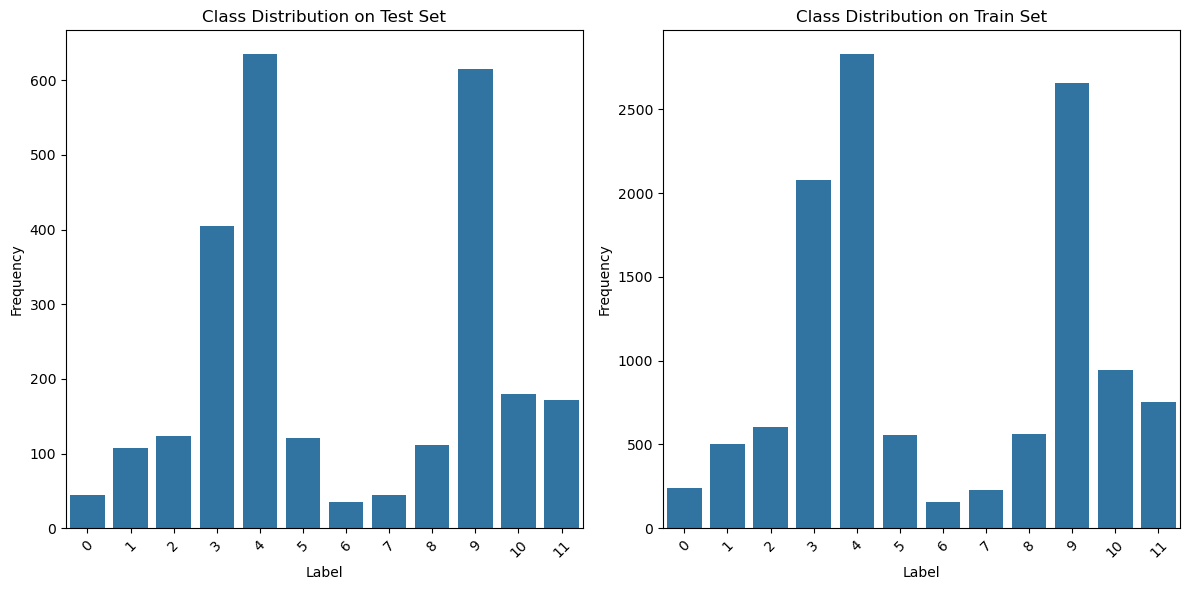

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

sns.countplot(x='label', data=test_data, ax=axes[0])
axes[0].set_title("Class Distribution on Test Set")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='label', data=train_data, ax=axes[1])
axes[1].set_title("Class Distribution on Train Set")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout() 
plt.show()



Trained on TF dataset MLP model evaluation on validation set 

| n_sizes  | accuracy          |
|----------|:--------------------:|
| 100   | 0.7908320493066255|
| 300   | 0.789291217257319 |
| 500   | 0.7885208012326657|
| 750   | 0.7900616332819723|

----------------------------------
Trained on TF-IDF dataset MLP model evaluation on validation set

| n_sizes  | accuracy          |
|----------|--------------------|
| (100,)   | 0.7873651771956857|
| (300,)   | 0.7846687211093991|
| (500,)   | 0.7850539291217258|
| (750,)   | 0.789291217257319 |

----------------------------------

Trained on TF dataset Random forest model evaluation on validation set

| Estimators   | max depth | accuracy          |
|--------------|-----------|-------------------|
| 10           | 5         | 0.5034668721109399|
| 10           | 10        | 0.5631741140215717|
| 10           | 20        | 0.6475346687211094|
| 50           | 5         | 0.5323574730354391|
| 50           | 10        | 0.5928351309707242|
| 50           | 20        | 0.6718027734976888|
| 100          | 5         | 0.5389060092449923|
| 100          | 10        | 0.5989984591679507|
| 100          | 20        | 0.6814329738058552|
| 200          | 5         | 0.5350539291217258|
| 200          | 10        | 0.5889830508474576|
| 200          | 20        | 0.6798921417565486|

----------------------------------
Trained on TF-IDF dataset Random forest model evaluation on validation set

| n_estimators | max_depth | accuracy          |
|--------------|-----------|-------------------|
| 10           | 5         | 0.5034668721109399|
| 10           | 10        | 0.562788906009245 |
| 10           | 20        | 0.6471494607087828|
| 50           | 5         | 0.5323574730354391|
| 50           | 10        | 0.5924499229583975|
| 50           | 20        | 0.6718027734976888|
| 100          | 5         | 0.5389060092449923|
| 100          | 10        | 0.5989984591679507|
| 100          | 20        | 0.6814329738058552|
| 200          | 5         | 0.5350539291217258|
| 200          | 10        | 0.5889830508474576|
| 200          | 20        | 0.6798921417565486|
----------------------------------

I believe that achieving higher accuracy in Random Forest model depends significantly on a well-chosen depth per estimator, along with a balanced, moderate number of estimators. Excessively high numbers of estimators may not always improve accuracy and can increase computation time without substantial performance gains.

For MLP model, there are numerous parameters I could experiment with. However, due to the limitations of the scikit-learn library and the extended runtime for each experiment, I focused primarily on tuning the number of perceptrons in the hidden layer. My findings suggest that increasing the number of perceptrons generally leads to better accuracy, although this may plateau or introduce diminishing returns as the network grows.

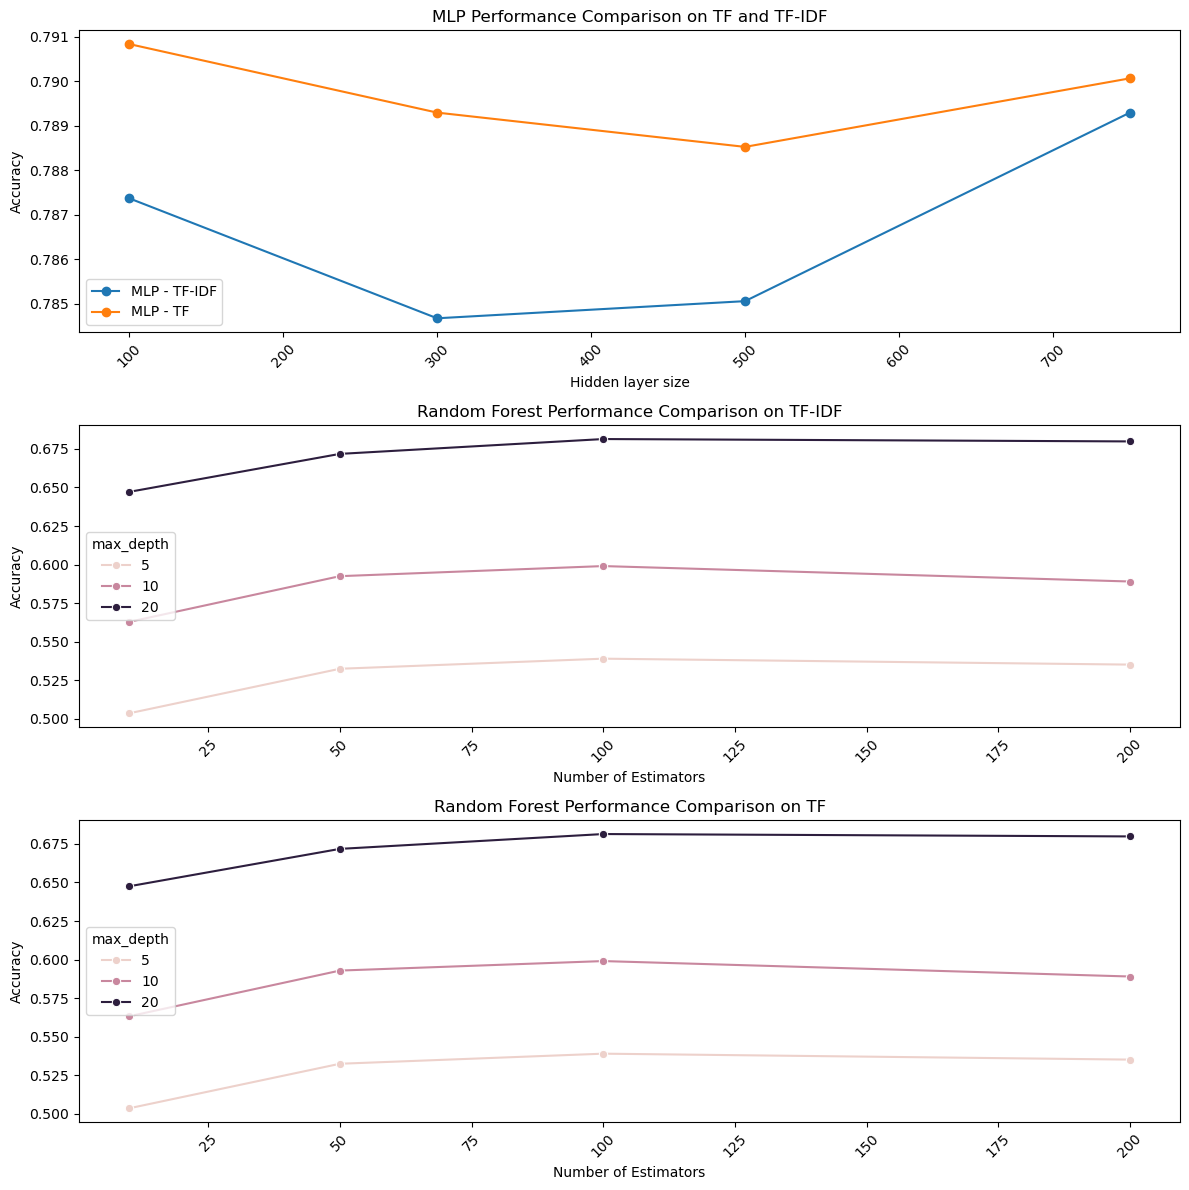

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot for MLP model
benchmark_mlp_tfidf["n_sizes"] = benchmark_mlp_tfidf["n_sizes"].apply(lambda x: x[0])
benchmark_mlp_tf["n_sizes"] = benchmark_mlp_tf["n_sizes"].apply(lambda x: x[0])
axes[0].plot(benchmark_mlp_tfidf["n_sizes"], benchmark_mlp_tfidf["accuracy"], marker='o', label=f"MLP - TF-IDF")
axes[0].plot(benchmark_mlp_tf["n_sizes"], benchmark_mlp_tf["accuracy"], marker='o', label=f"MLP - TF")

axes[0].set_title("MLP Performance Comparison on TF and TF-IDF")
axes[0].set_xlabel("Hidden layer size")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)



# Plot for Random Forest model
sns.lineplot(data=benchmark_rf_tfidf, x='n_estimators', y='accuracy', hue='max_depth', marker='o', ax=axes[1])
sns.lineplot(data=benchmark_rf_tf, x='n_estimators', y='accuracy', hue='max_depth', marker='o', ax=axes[2])

axes[1].set_title("Random Forest Performance Comparison on TF-IDF")
axes[1].set_xlabel("Number of Estimators")
axes[1].set_ylabel("Accuracy")
axes[1].legend(title="max_depth")
axes[1].tick_params(axis='x', rotation=45)

axes[2].set_title("Random Forest Performance Comparison on TF")
axes[2].set_xlabel("Number of Estimators")
axes[2].set_ylabel("Accuracy")
axes[2].legend(title="max_depth")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Confusion matrix

I used MLP model with TF-IDF features to generate the confusion matrix because it yielded the highest accuracy among the tested approaches. The results below indicate that the model performs particularly well in distinguishing Health, Food, and Protection. However, it struggles significantly with classes like Agriculture, Logistics, and NFI.

The confusion matrix reveals specific areas where the model encounters challenges:

- Health is often confused with Protection (28 instances).
- Protection is frequently misclassified as Shelter (25 instances).
- Food is misclassified as Livelihood (27 instances).
- Protection is sometimes confused with Cross (21 instances).
- Food is occasionally mistaken for Agriculture (18 instances).

These confusions likely stem from inconsistencies in class distribution and the high similarity between certain categories. For example, Agriculture and Food share overlapping characteristics, as do Protection and Shelter. Such similarities make it challenging for the model to distinguish between these topics accurately, leading to confusion in its decision-making process.

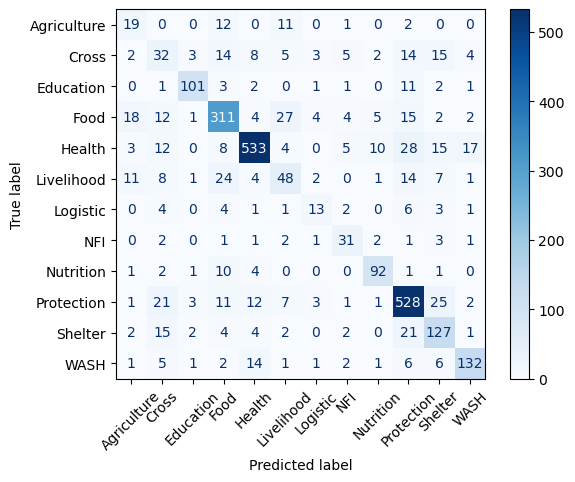

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = mlp_classifier_tfidf.predict(tfidf_test)

cm = confusion_matrix(y_true=test_data['label'],y_pred= preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= pd.read_csv( "nlp2023_24_data/thedeep.labels.txt",
                                                                                sep=",",
                                                                                names=["id", "label"])["label"])    #mlp_classifier_tfidf.model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

### Features visualization

We see in the plot below that the labels Education(2), Food(3), Health(4) and Protection (9) are the dominant classifications in both true and predicted lables. In crowded regions, where data points from multiple classes are close to each other, the model tends to predict the most frequent or confident label in that area, sometimes overshadowing less represented classes. By looking at the two plots we can see an estimate of appr. 80% similarity  

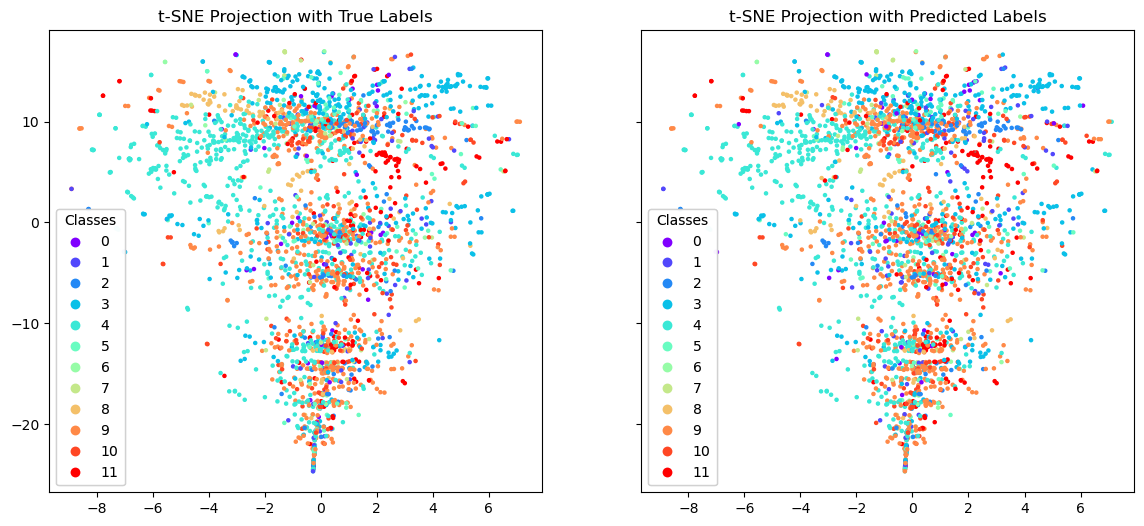

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30,  n_iter=1000, random_state=4) #learning_rate=200,)
reduced_test_form = tsne.fit_transform(tfidf_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# True label plot
scatter1 = axes[0].scatter(reduced_test_form[:, 0], reduced_test_form[:, 1], 
                           c=test_data['label'], cmap=plt.cm.rainbow, s=5)
axes[0].set_title("t-SNE Projection with True Labels")
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Classes")
axes[0].add_artist(legend1)

# Predicted label plot
scatter2 = axes[1].scatter(reduced_test_form[:, 0], reduced_test_form[:, 1], 
                           c=preds, cmap=plt.cm.rainbow, s=5)
axes[1].set_title("t-SNE Projection with Predicted Labels")
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Classes")
axes[1].add_artist(legend2)

plt.show()


<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.


In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=4)
model.fit(tfidf_train, train_data['label'])

coefficients = model.coef_
print(coefficients.shape)


(12, 12981)


In [ ]:
top_tokens_per_class = {}
num_top_tokens = 10  
labels = pd.read_csv( "nlp2023_24_data/thedeep.labels.txt",  sep=",", names=["id", "label"])
for class_index in range(coefficients.shape[0]):
    class_coefs = coefficients[class_index]
    
    # Find indices of top tokens for the class
    top_token_indices = np.argsort(class_coefs)[-num_top_tokens:][::-1]
    
    top_tokens = [(list(vocabulary)[i], class_coefs[i]) for i in top_token_indices]
    top_tokens_per_class[class_index] = top_tokens
    
    print(f"Class {labels[labels['id']==class_index]['label']}: Top tokens")
    for token, weight in top_tokens:
        print(f"  Token: {token}, Weight: {weight}")


Class 0    Agriculture
Name: label, dtype: object: Top tokens
  Token: physically, Weight: 0.6727273979462833
  Token: boro, Weight: 0.6001519385703389
  Token: unclear, Weight: 0.595744617056195
  Token: hectare, Weight: 0.5673755098381971
  Token: cultivate, Weight: 0.5663473272908881
  Token: grant, Weight: 0.5586119952466633
  Token: rai, Weight: 0.5364346525608714
  Token: lifeline, Weight: 0.5284375756080089
  Token: require, Weight: 0.5185473647004133
  Token: pig, Weight: 0.5135652760785065
Class 1    Cross
Name: label, dtype: object: Top tokens
  Token: italy, Weight: 0.8492377238752509
  Token: heatstroke, Weight: 0.8305689394902315
  Token: humanitarian, Weight: 0.800418927958743
  Token: imminence, Weight: 0.7849987779131047
  Token: sometimes, Weight: 0.7617294412599392
  Token: santa, Weight: 0.7145172601909004
  Token: havana, Weight: 0.6729383283777695
  Token: missing, Weight: 0.628480963662317
  Token: restoration, Weight: 0.6250667108294743
  Token: daily, Weight: 0.

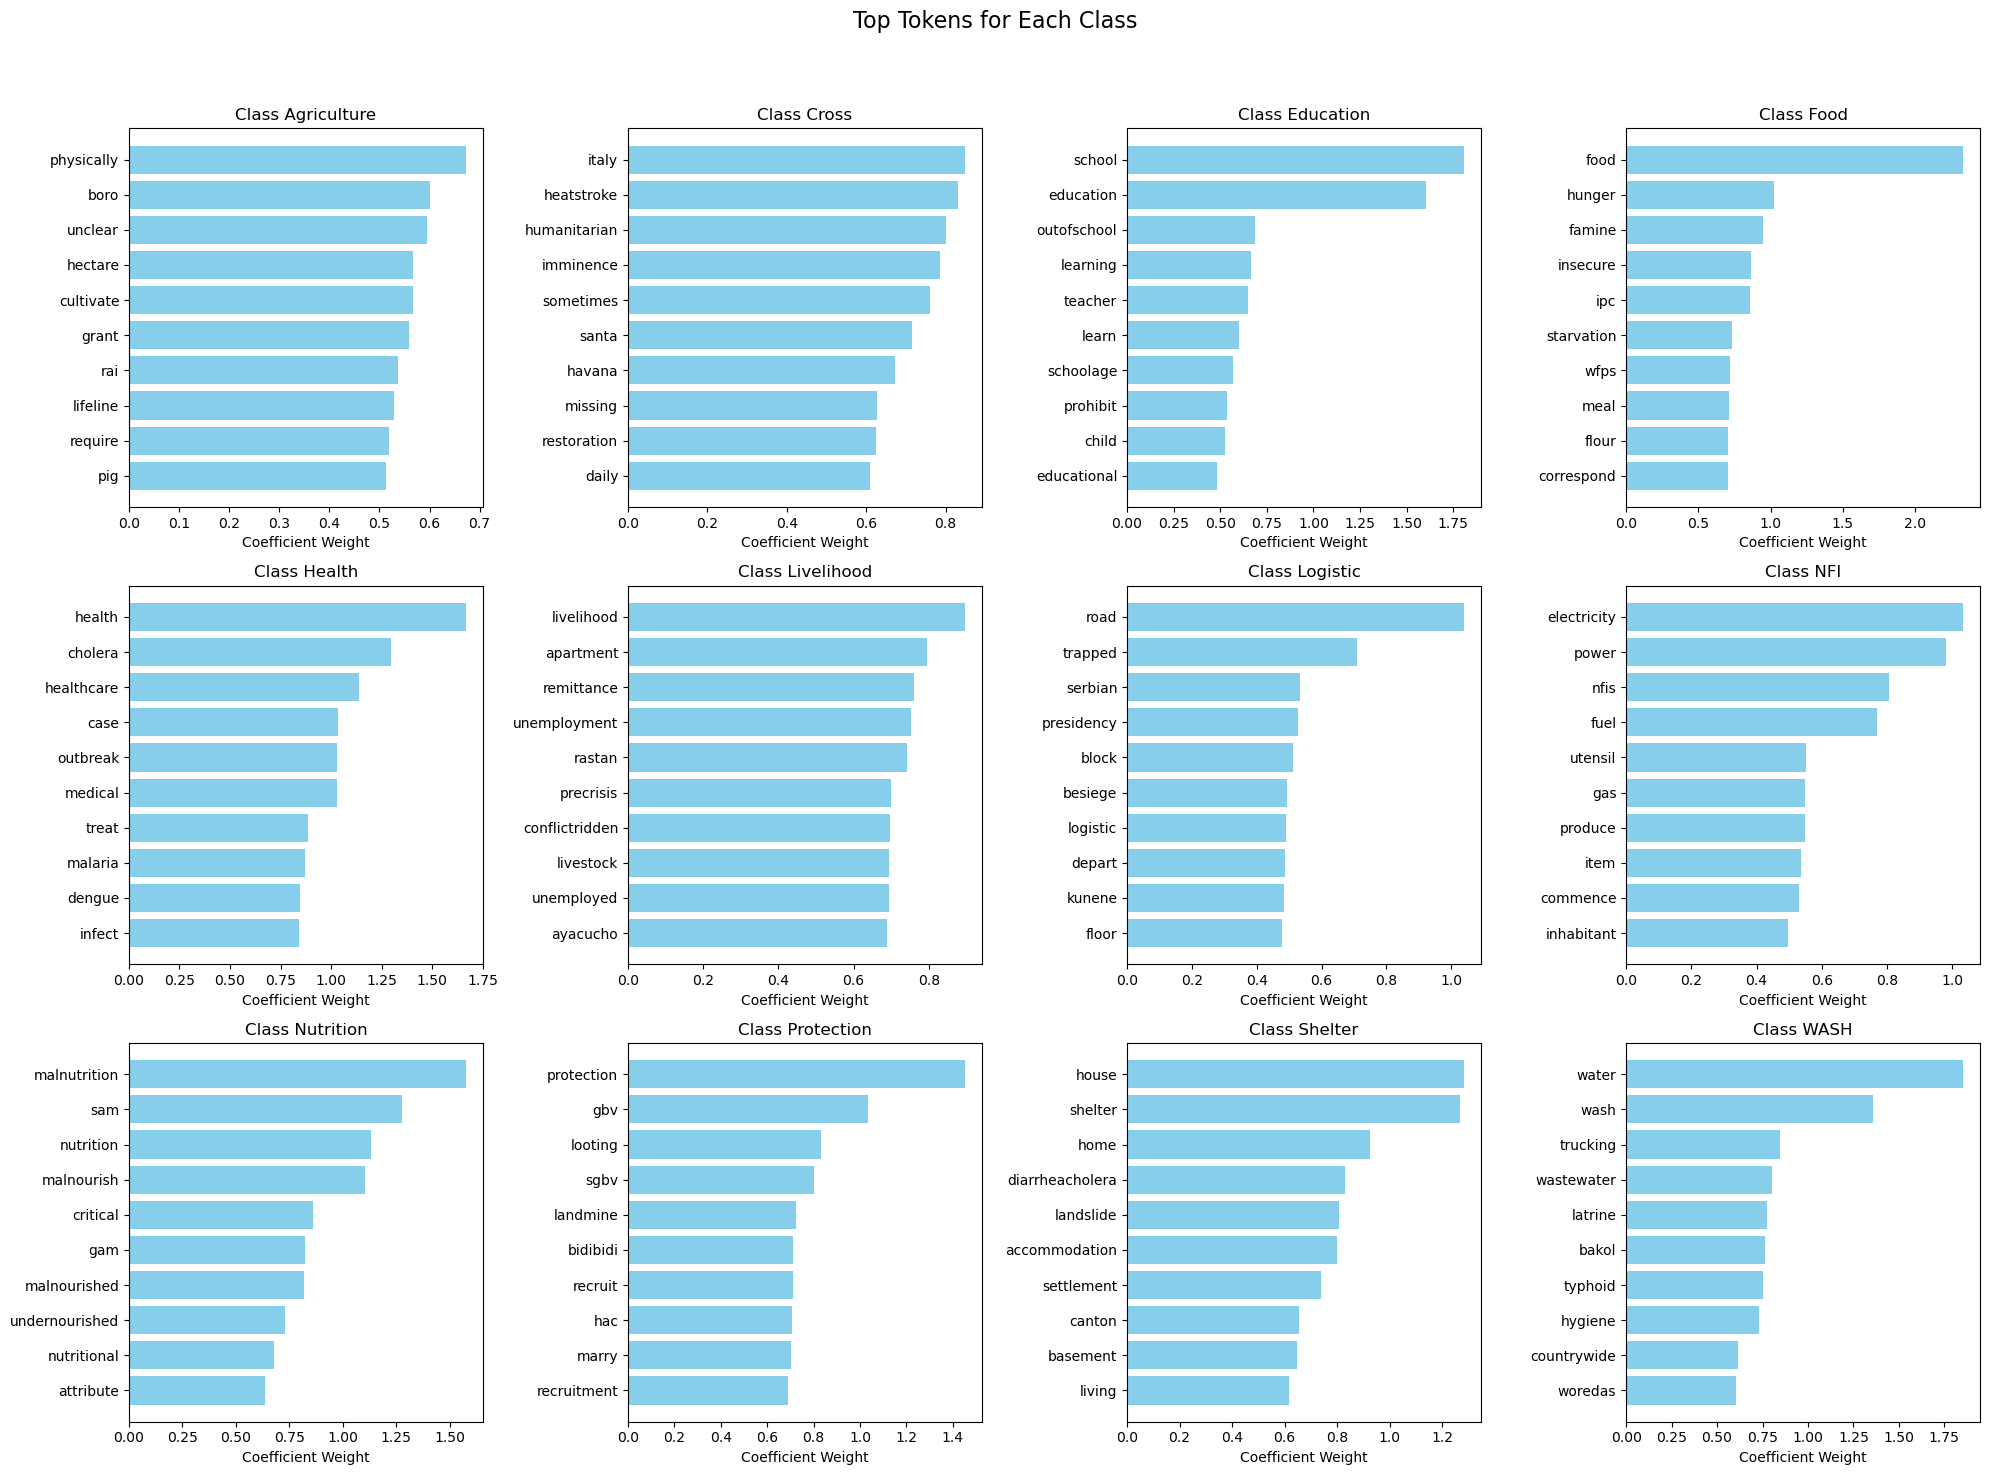

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=False, sharey=False)
fig.suptitle("Top Tokens for Each Class", fontsize=16)

for class_index in range(12):
    tokens, weights = zip(*top_tokens_per_class[class_index])

    row = class_index // 4
    col = class_index % 4
    ax = axes[row, col]

    ax.barh(tokens, weights, color='skyblue')
    ax.set_xlabel("Coefficient Weight")
    ax.set_title(f"Class {labels.loc[labels['id'] == class_index, 'label'].values[0]}")
    ax.invert_yaxis()  

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
